# Titanic

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


|variable|defination|key|
|:---|:---|:---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years
|sibsp|# of siblings / spouses aboard the Titanic
|parch|# of parents / children aboard the Titanic
|ticket|Ticket number
|fare|Passenger fare
|cabin|Cabin number
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [3]:
# remove Cabin and fill NaN value
data = data.drop(['Cabin', 'Ticket'], axis=1)
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


In [4]:
data['Title'] = data['Name'].apply(
    lambda name: name.split(',')[1].split('.')[0].strip())
data = data.drop(['Name'], axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,28.0,0,0,8.0500,S,Mr
414,1306,NaN,1,female,39.0,0,0,108.9000,C,Dona
415,1307,NaN,3,male,38.5,0,0,7.2500,S,Mr
416,1308,NaN,3,male,28.0,0,0,8.0500,S,Mr


In [5]:
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Sir               1
the Countess      1
Don               1
Capt              1
Lady              1
Mme               1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [6]:
title_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2,
    "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,        "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,           "Sir": 3
}
data['Title'] = data['Title'].map(title_mapping)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1.0,1,female,38.0,1,0,71.2833,C,2.0
2,3,1.0,3,female,26.0,0,0,7.9250,S,1.0
3,4,1.0,1,female,35.0,1,0,53.1000,S,2.0
4,5,0.0,3,male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,28.0,0,0,8.0500,S,0.0
414,1306,NaN,1,female,39.0,0,0,108.9000,C,3.0
415,1307,NaN,3,male,38.5,0,0,7.2500,S,0.0
416,1308,NaN,3,male,28.0,0,0,8.0500,S,0.0


In [7]:
data['Family'] = data['SibSp'] + data['Parch'] + 1
data = data.drop(columns=['SibSp', 'Parch'])
data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,7.2500,S,0.0,2
1,2,1.0,1,female,38.0,71.2833,C,2.0,2
2,3,1.0,3,female,26.0,7.9250,S,1.0,1
3,4,1.0,1,female,35.0,53.1000,S,2.0,2
4,5,0.0,3,male,35.0,8.0500,S,0.0,1
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,28.0,8.0500,S,0.0,1
414,1306,NaN,1,female,39.0,108.9000,C,3.0,1
415,1307,NaN,3,male,38.5,7.2500,S,0.0,1
416,1308,NaN,3,male,28.0,8.0500,S,0.0,1


In [8]:
sex_mapping = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(sex_mapping)
data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0.0,3,0,22.0,7.2500,S,0.0,2
1,2,1.0,1,1,38.0,71.2833,C,2.0,2
2,3,1.0,3,1,26.0,7.9250,S,1.0,1
3,4,1.0,1,1,35.0,53.1000,S,2.0,2
4,5,0.0,3,0,35.0,8.0500,S,0.0,1
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,28.0,8.0500,S,0.0,1
414,1306,NaN,1,1,39.0,108.9000,C,3.0,1
415,1307,NaN,3,0,38.5,7.2500,S,0.0,1
416,1308,NaN,3,0,28.0,8.0500,S,0.0,1


In [9]:
data['Embarked'].value_counts()
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(embarked_map)

In [10]:
data['Title'] = data['Title'].fillna(0.0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   Fare         1309 non-null   float64
 6   Embarked     1309 non-null   int64  
 7   Title        1309 non-null   float64
 8   Family       1309 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 102.3 KB


In [11]:
train = data[data['Survived'].notnull()]
test = data[data['Survived'].isnull()]

In [12]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0.0,3,0,22.0,7.2500,0,0.0,2
1,2,1.0,1,1,38.0,71.2833,1,2.0,2
2,3,1.0,3,1,26.0,7.9250,0,1.0,1
3,4,1.0,1,1,35.0,53.1000,0,2.0,2
4,5,0.0,3,0,35.0,8.0500,0,0.0,1
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,0,27.0,13.0000,0,3.0,1
887,888,1.0,1,1,19.0,30.0000,0,1.0,1
888,889,0.0,3,1,28.0,23.4500,0,1.0,4
889,890,1.0,1,0,26.0,30.0000,1,0.0,1


Text(0.5, 1.0, 'Passengers per boarding location')

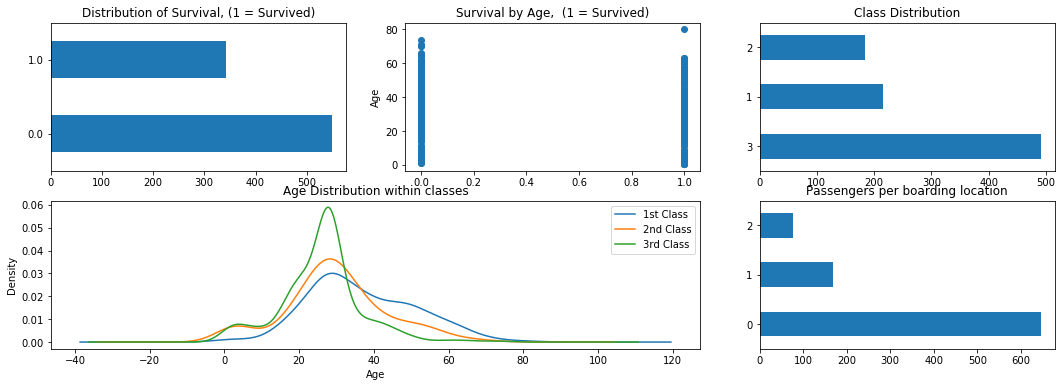

In [13]:
fig = plt.figure(figsize=(18, 6))

# plot.subplot2grid: create an axis at specific location inside a regular grid.
ax1 = plt.subplot2grid((2, 3), (0, 0))
train['Survived'].value_counts().plot(kind='barh')
plt.title("Distribution of Survival, (1 = Survived)")

ax2 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(train['Survived'], train['Age'])
plt.ylabel("Age")
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2, 3), (0, 2))
train['Pclass'].value_counts().plot(kind='barh')
plt.title("Class Distribution")

ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=2)
# kernel density estimate
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

ax5 = plt.subplot2grid((2, 3), (1, 2))
train['Embarked'].value_counts().plot(kind='barh')
plt.title("Passengers per boarding location")

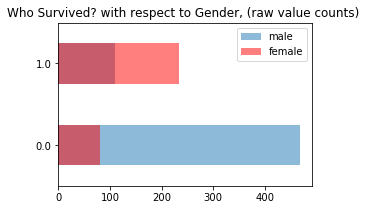

In [14]:
male = train['Survived'][train['Sex'] == 0].value_counts().sort_index()
female = train['Survived'][train['Sex'] == 1].value_counts().sort_index()

fig = plt.figure(figsize=(10, 3))

ax1 = fig.add_subplot(121)
male.plot(kind='barh', label='male', alpha=0.5)
female.plot(kind='barh', label='female', color='red', alpha=0.5)
plt.title("Who Survived? with respect to Gender, (raw value counts) ")
plt.legend(loc='best')

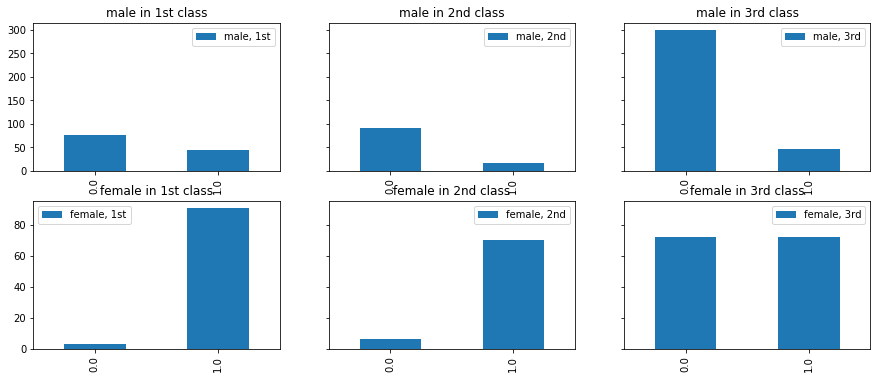

In [15]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(231)
male_1st = train['Survived'][train['Sex'] == 0][train['Pclass'] == 1].value_counts().sort_index()
male_1st.plot(kind='bar', label='male, 1st')
plt.title("male in 1st class")
plt.legend(loc='best')

ax2 = fig.add_subplot(232, sharey=ax1)
male_2nd = train['Survived'][train['Sex'] == 0][train['Pclass'] == 2].value_counts().sort_index()
male_2nd.plot(kind='bar', label='male, 2nd')
plt.title("male in 2nd class")
plt.legend(loc='best')

ax3 = fig.add_subplot(233, sharey=ax1)
male_3rd = train['Survived'][train['Sex'] == 0][train['Pclass'] == 3].value_counts().sort_index()
male_3rd.plot(kind='bar', label='male, 3rd')
plt.title("male in 3rd class")
plt.legend(loc='best')

ax4 = fig.add_subplot(234)
female_1st = train['Survived'][train['Sex'] == 1][train['Pclass'] == 1].value_counts().sort_index()
female_1st.plot(kind='bar', label='female, 1st')
plt.title("female in 1st class")
plt.legend(loc='best')

ax5 = fig.add_subplot(235, sharey=ax4)
female_2nd = train['Survived'][train['Sex'] == 1][train['Pclass'] == 2].value_counts().sort_index()
female_2nd.plot(kind='bar', label='female, 2nd')
plt.title("female in 2nd class")
plt.legend(loc='best')

ax6 = fig.add_subplot(236, sharey=ax4)
female_3rd = train['Survived'][train['Sex'] == 1][train['Pclass'] == 3].value_counts().sort_index()
female_3rd.plot(kind='bar', label='female, 3rd')
plt.title("female in 3rd class")
plt.legend(loc='best')

Text(0.5, 1.0, 'Age by Fare')

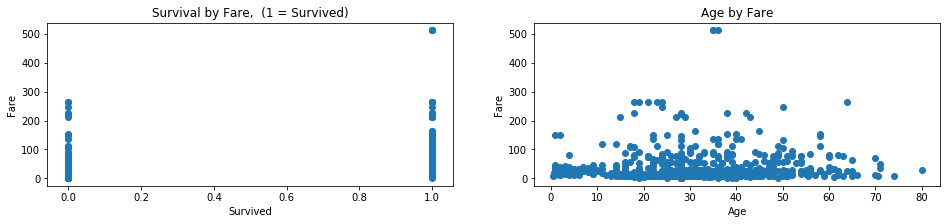

In [16]:
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(121)
plt.scatter(train['Survived'], train['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title("Survival by Fare,  (1 = Survived)")

ax2 = fig.add_subplot(122)
plt.scatter(train['Age'], train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age by Fare')

Text(0.5, 1.0, 'title not survived, 0 for Mr, 1 for Miss, 2 fro Mrs, 3 for other')

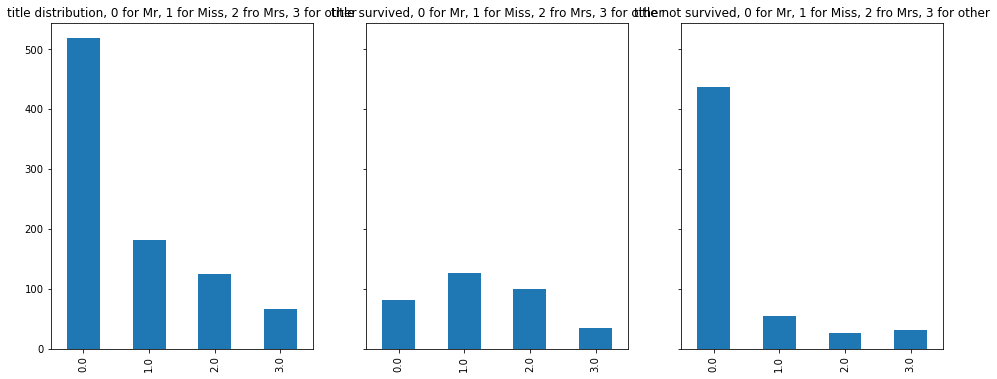

In [17]:
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(131)
title_count = train['Title'].value_counts().sort_index()
title_count.plot(kind='bar')
plt.title('title distribution, 0 for Mr, 1 for Miss, 2 fro Mrs, 3 for other')

ax2 = fig.add_subplot(132, sharey=ax1)
title_survived = train['Title'][train['Survived'] == 1].value_counts().sort_index()
title_survived.plot(kind='bar')
plt.title('title survived, 0 for Mr, 1 for Miss, 2 fro Mrs, 3 for other')

ax3 = fig.add_subplot(133, sharey=ax1)
title_not_survived = train['Title'][train['Survived'] == 0].value_counts().sort_index()
title_not_survived.plot(kind='bar')
plt.title('title not survived, 0 for Mr, 1 for Miss, 2 fro Mrs, 3 for other')

In [18]:
train = data[data['Survived'].notnull()]
test = data[data['Survived'].isnull()]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
test

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,892,NaN,3,0,34.5,7.8292,2,0.0,1
1,893,NaN,3,1,47.0,7.0000,0,2.0,2
2,894,NaN,2,0,62.0,9.6875,2,0.0,1
3,895,NaN,3,0,27.0,8.6625,0,0.0,1
4,896,NaN,3,1,22.0,12.2875,0,2.0,3
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,28.0,8.0500,0,0.0,1
414,1306,NaN,1,1,39.0,108.9000,1,3.0,1
415,1307,NaN,3,0,38.5,7.2500,0,0.0,1
416,1308,NaN,3,0,28.0,8.0500,0,0.0,1


In [21]:
X = train.drop(columns=['Survived', 'PassengerId'])
y = train['Survived']
X

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,0,22.0,7.2500,0,0.0,2
1,1,1,38.0,71.2833,1,2.0,2
2,3,1,26.0,7.9250,0,1.0,1
3,1,1,35.0,53.1000,0,2.0,2
4,3,0,35.0,8.0500,0,0.0,1
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,3.0,1
887,1,1,19.0,30.0000,0,1.0,1
888,3,1,28.0,23.4500,0,1.0,4
889,1,0,26.0,30.0000,1,0.0,1


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
 5   Title     891 non-null    float64
 6   Family    891 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


In [31]:
X = X.drop(['Embarked'], axis=1)

In [32]:
# X = scale(X)
scaler = MinMaxScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
X

,Pclass,Sex,Age,Fare,Title,Family
0,3,0,0.271174,0.014151,0.0,2
1,1,1,0.472229,0.139136,2.0,2
2,3,1,0.321438,0.015469,1.0,1
3,1,1,0.434531,0.103644,2.0,2
4,3,0,0.434531,0.015713,0.0,1
...,...,...,...,...,...,...
886,2,0,0.334004,0.025374,3.0,1
887,1,1,0.233476,0.058556,1.0,1
888,3,1,0.346569,0.045771,1.0,4
889,1,0,0.321438,0.058556,0.0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(20),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=10, n_estimators=20),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)
    

Nearest Neighbors 0.7985074626865671
Linear SVM 0.8134328358208955
RBF SVM 0.7985074626865671
Decision Tree 0.7835820895522388
Random Forest 0.8246268656716418
Neural Net 0.8171641791044776
AdaBoost 0.7985074626865671
Naive Bayes 0.8059701492537313


In [26]:
passengerId = test['PassengerId']
test = test.drop(['Survived', 'PassengerId'], axis=1)

In [35]:
test = test.drop(['Embarked'], axis=1)
test

,Pclass,Sex,Age,Fare,Title,Family
0,3,0,34.5,7.8292,0.0,1
1,3,1,47.0,7.0000,2.0,2
2,2,0,62.0,9.6875,0.0,1
3,3,0,27.0,8.6625,0.0,1
4,3,1,22.0,12.2875,2.0,3
...,...,...,...,...,...,...
413,3,0,28.0,8.0500,0.0,1
414,1,1,39.0,108.9000,3.0,1
415,3,0,38.5,7.2500,0.0,1
416,3,0,28.0,8.0500,0.0,1


In [262]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X, y)

In [36]:
svm = SVC(kernel="linear", C=0.025)
svm.fit(X, y)

SVC(C=0.025, kernel='linear')

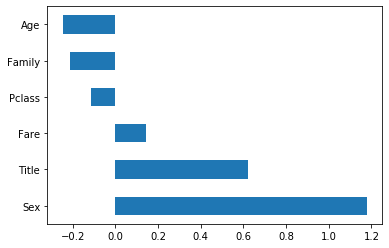

In [37]:
importances = pd.Series(svm.coef_[0], index=X.columns)
importances.nlargest(20).plot(kind='barh')

predict = svm.predict(test)

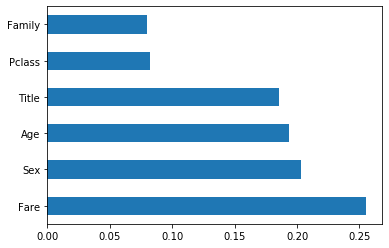

In [47]:
forest = RandomForestClassifier(max_depth=10, n_estimators=20)
forest.fit(X, y)

importances = pd.Series(forest.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')

predict = forest.predict(test)

In [48]:
submission = pd.DataFrame()
submission['passengerId'] = passengerId
submission['Survived'] = predict
submission['Survived'] = submission['Survived'].astype('int')
submission.to_csv('submission.csv', index=False)